# Evaluating Brian Brobbey's Efficiency: A Season-by-Season Analysis

As a small project, I took it upon myself to analyze Brian Brobbey's efficiency as a striker, since I am annoyed by people who think he is a good striker. Last season he did play well, but overall I do not think he is strong in the penalty box. So, to find out if what I was thinking I was actually true, I started this small research to back it up with data.

Some improvements can be made, for example only include Eredivisie teams instead of a league lower, and exclude data from lower leagues for a more direct comparison. However, including performances from other leagues, such as Pepi’s time at Jong PSV during the same season as his PSV first-team appearances, can still provide useful context in evaluating a player's overall efficiency across different levels of competition.

Moreover, this would be a more in-depth analysis if there would be more stats available. Unfortunately, FBref does not provide much stats aside from standard and shooting tables in the Eredivisie.

Overall, this analysis gives a good indication of Brobbey’s efficiency, but it does have its limitations due to the lack of detailed data. Stats like expected goals (xG), shot placement, or his overall involvement in attacking play would paint a more complete picture and allow more visualizations to be made. That being said, even with the available numbers, it’s clear that Brobbey’s efficiency isn’t as strong as some people suggest. With more data and better comparisons within the Eredivisie, it would be easier to see whether his struggles are down to his own finishing ability or the way he’s being used in the team.

In [626]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Radar, FontManager

In [515]:
# Download contents from page
url_brobbey = 'https://fbref.com/en/players/4c184730/Brian-Brobbey'
url_pepi = 'https://fbref.com/en/players/a2b1ed42/Ricardo-Pepi'
url_parrott = 'https://fbref.com/en/players/4357f557/Troy-Parrott'
headers = {"User-Agent":"Mozilla/5.0"}

# Get response
response_pepi = requests.get(url_pepi,headers=headers)
response_brobbey = requests.get(url_brobbey,headers=headers)
response_parrott = requests.get(url_parrott, headers=headers)
response_pepi

<Response [200]>

In [534]:
soup_brobbey = BeautifulSoup(response_brobbey.text,"html.parser")
soup_pepi = BeautifulSoup(response_pepi.text,"html.parser")
soup_parrott = BeautifulSoup(response_parrott.text,"html.parser")

def extract_table_data(soup, table_id):
    table = soup.find("table",{"id": table_id})
    thead = table.find("thead")
    header_rows = thead.find_all("tr")
    header_row = header_rows[-1]
    headers = [th.get_text(strip = True) for th in header_row.find_all("th")]
    
    data = []
    for row in table.find("tbody").find_all("tr"):
        cols = []
        for th in row.find_all("th"):
            cols.append(th.get_text(strip = True))
        for td in row.find_all("td"):
            cols.append(td.get_text(strip = True))
        if cols:
            data.append(cols)
    return pd.DataFrame(data, columns=headers)

In [537]:
df_standard_brobbey = extract_table_data(soup_brobbey,"stats_standard_dom_lg")
df_standard_pepi = extract_table_data(soup_pepi,"stats_standard_dom_lg")
df_standard_parrott = extract_table_data(soup_parrott,"stats_standard_dom_lg")

df_shooting_brobbey = extract_table_data(soup_brobbey,"stats_shooting_dom_lg")
df_shooting_pepi = extract_table_data(soup_pepi,"stats_shooting_dom_lg")
df_shooting_parrott = extract_table_data(soup_parrott,"stats_shooting_dom_lg")

df_standard_brobbey['player'] = 'Brian Brobbey'
df_standard_pepi['player'] = 'Ricardo Pepi'
df_standard_parrott['player'] = 'Troy Parrott'

df_shooting_brobbey['player'] = 'Brian Brobbey'
df_shooting_pepi['player'] = 'Ricardo Pepi'
df_shooting_parrott['player'] = 'Troy Parrott'

df_standard = pd.concat([df_standard_brobbey, df_standard_pepi,df_standard_parrott],ignore_index = True)
df_shooting = pd.concat([df_shooting_brobbey,df_shooting_pepi,df_shooting_parrott],ignore_index = True)

In [645]:
display(df_standard)

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,...,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,G+A-PK,player,goals_per_90
0,2018-2019,16,Jong Ajax,nlNED,2.Eerste Divisie,11th,2,0,56,0.6,...,0,0,0,0,0,1,0,0.00,Brian Brobbey,0.00
1,2019-2020,17,Jong Ajax,nlNED,2.Eerste Divisie,4th,13,7,601,6.7,...,1,8,6,1,1,2,0,1.05,Brian Brobbey,1.05
2,2020-2021,18,Ajax,nlNED,1.Eredivisie,1st,12,1,200,2.2,...,1,4,3,0,0,0,0,1.80,Brian Brobbey,1.35
3,2020-2021,18,Jong Ajax,nlNED,2.Eerste Divisie,16th,17,13,1114,12.4,...,4,13,7,2,3,3,0,0.89,Brian Brobbey,0.73
4,2021-2022,19,RB Leipzig,deGER,1.Bundesliga,4th,9,1,131,1.5,...,2,2,0,0,0,0,0,1.37,Brian Brobbey,0.00
5,2021-2022,19,Ajax,nlNED,1.Eredivisie,1st,11,4,399,4.4,...,1,8,7,0,0,1,0,1.80,Brian Brobbey,1.58
6,2021-2022,19,Jong Ajax,nlNED,2.Eerste Divisie,7th,1,1,60,0.7,...,0,1,0,1,1,0,0,0.00,Brian Brobbey,1.50
7,2022-2023,20,Jong Ajax,nlNED,2.Eerste Divisie,13th,1,1,45,0.5,...,0,0,0,0,0,0,0,0.00,Brian Brobbey,0.00
8,2022-2023,20,Ajax,nlNED,1.Eredivisie,3rd,32,17,1650,18.3,...,3,16,13,0,0,1,0,0.87,Brian Brobbey,0.71
9,2023-2024,21,Ajax,nlNED,1.Eredivisie,5th,30,29,2405,26.7,...,8,26,18,0,1,4,0,0.97,Brian Brobbey,0.67


In [539]:
df_shooting.head()

,Season,Age,Squad,Country,Comp,LgRank,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,player
0,2018-2019,16,Jong Ajax,nlNED,2.Eerste Divisie,11th,0.6,0,,,...,,0,0,,,,,,Matches,Brian Brobbey
1,2019-2020,17,Jong Ajax,nlNED,2.Eerste Divisie,4th,6.7,7,27,15,...,,1,1,,,,,,Matches,Brian Brobbey
2,2020-2021,18,Ajax,nlNED,1.Eredivisie,1st,2.2,3,12,6,...,,0,0,,,,,,Matches,Brian Brobbey
3,2020-2021,18,Jong Ajax,nlNED,2.Eerste Divisie,16th,12.4,9,44,22,...,,2,3,,,,,,Matches,Brian Brobbey
4,2021-2022,19,RB Leipzig,deGER,1.Bundesliga,4th,1.5,0,4,0,...,0,0,0,0.6,0.6,0.16,-0.6,-0.6,Matches,Brian Brobbey


In [540]:
# Drop & convert columns from dtype objects to numerical
df_standard = df_standard.drop(columns=[
    'xG',
    'npxG',
    'xAG',
    'npxG+xAG',
    'PrgC',
    'PrgP',
    'PrgR',
    'xG+xAG',
    'Matches'])

df_standard.columns = [col.strip() for col in df_standard.columns]
df_standard = df_standard.loc[:, ~df_standard.columns.duplicated(keep='first')]

cols_to_convert = [
    'Gls', 
    'Min',
    'Starts',
    '90s',
    'Ast',
    'G+A',
    'G-PK',
    'PK',
    'PKatt',
    'CrdY',
    'CrdR',
    'Gls',
    'Ast',
    'G+A',
    'G+A-PK']


# Since ',' characters aren't handled properly, remove from df
for col in cols_to_convert:
    if col in df_standard.columns:  
        df_standard[col] = (
            df_standard[col]
            .astype(str)
            .str.replace(r"[^\d.]", "", regex=True)
            .str.strip()
            .replace("", pd.NA) 
        )
        df_standard[col] = pd.to_numeric(df_standard[col], errors='coerce')

# Years need to be replaced for US, since US seasons are calendar years
df_standard['Season'] = df_standard['Season'].apply(
    lambda x: f"{int(x)}-{int(x)+1}" if x.isdigit() else x
)

df_shooting['Season'] = df_shooting['Season'].apply(
    lambda x: f"{int(x)}-{int(x)+1}" if x.isdigit() else x
)


display(df_standard)

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,G+A-PK,player
0,2018-2019,16,Jong Ajax,nlNED,2.Eerste Divisie,11th,2,0,56,0.6,0,0,0,0,0,0,1,0,0.00,Brian Brobbey
1,2019-2020,17,Jong Ajax,nlNED,2.Eerste Divisie,4th,13,7,601,6.7,7,1,8,6,1,1,2,0,1.05,Brian Brobbey
2,2020-2021,18,Ajax,nlNED,1.Eredivisie,1st,12,1,200,2.2,3,1,4,3,0,0,0,0,1.80,Brian Brobbey
3,2020-2021,18,Jong Ajax,nlNED,2.Eerste Divisie,16th,17,13,1114,12.4,9,4,13,7,2,3,3,0,0.89,Brian Brobbey
4,2021-2022,19,RB Leipzig,deGER,1.Bundesliga,4th,9,1,131,1.5,0,2,2,0,0,0,0,0,1.37,Brian Brobbey
5,2021-2022,19,Ajax,nlNED,1.Eredivisie,1st,11,4,399,4.4,7,1,8,7,0,0,1,0,1.80,Brian Brobbey
6,2021-2022,19,Jong Ajax,nlNED,2.Eerste Divisie,7th,1,1,60,0.7,1,0,1,0,1,1,0,0,0.00,Brian Brobbey
7,2022-2023,20,Jong Ajax,nlNED,2.Eerste Divisie,13th,1,1,45,0.5,0,0,0,0,0,0,0,0,0.00,Brian Brobbey
8,2022-2023,20,Ajax,nlNED,1.Eredivisie,3rd,32,17,1650,18.3,13,3,16,13,0,0,1,0,0.87,Brian Brobbey
9,2023-2024,21,Ajax,nlNED,1.Eredivisie,5th,30,29,2405,26.7,18,8,26,18,0,1,4,0,0.97,Brian Brobbey


In [541]:
df_standard.describe()

,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,G+A-PK
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,9.225806,833.064516,9.261290,4.774194,1.419355,6.193548,4.419355,0.354839,0.451613,0.967742,0.064516,0.621935
std,10.288212,871.776727,9.671562,5.207108,2.045714,6.886796,5.044959,0.608188,0.722897,1.196770,0.249731,0.625750
min,0.000000,7.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,92.500000,1.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,484.000000,5.400000,3.000000,1.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.510000
75%,16.500000,1379.500000,15.300000,8.500000,2.000000,13.000000,7.000000,1.000000,1.000000,2.000000,0.000000,1.010000
max,34.000000,2991.000000,33.200000,18.000000,8.000000,26.000000,18.000000,2.000000,3.000000,4.000000,1.000000,1.800000


In [647]:
df_standard['goals_per_90'] = ((df_standard['Gls'] / df_standard['Min']) * 90).round(2)
display(df_standard)

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,...,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,G+A-PK,player,goals_per_90
0,2018-2019,16,Jong Ajax,nlNED,2.Eerste Divisie,11th,2,0,56,0.6,...,0,0,0,0,0,1,0,0.00,Brian Brobbey,0.00
1,2019-2020,17,Jong Ajax,nlNED,2.Eerste Divisie,4th,13,7,601,6.7,...,1,8,6,1,1,2,0,1.05,Brian Brobbey,1.05
2,2020-2021,18,Ajax,nlNED,1.Eredivisie,1st,12,1,200,2.2,...,1,4,3,0,0,0,0,1.80,Brian Brobbey,1.35
3,2020-2021,18,Jong Ajax,nlNED,2.Eerste Divisie,16th,17,13,1114,12.4,...,4,13,7,2,3,3,0,0.89,Brian Brobbey,0.73
4,2021-2022,19,RB Leipzig,deGER,1.Bundesliga,4th,9,1,131,1.5,...,2,2,0,0,0,0,0,1.37,Brian Brobbey,0.00
5,2021-2022,19,Ajax,nlNED,1.Eredivisie,1st,11,4,399,4.4,...,1,8,7,0,0,1,0,1.80,Brian Brobbey,1.58
6,2021-2022,19,Jong Ajax,nlNED,2.Eerste Divisie,7th,1,1,60,0.7,...,0,1,0,1,1,0,0,0.00,Brian Brobbey,1.50
7,2022-2023,20,Jong Ajax,nlNED,2.Eerste Divisie,13th,1,1,45,0.5,...,0,0,0,0,0,0,0,0.00,Brian Brobbey,0.00
8,2022-2023,20,Ajax,nlNED,1.Eredivisie,3rd,32,17,1650,18.3,...,3,16,13,0,0,1,0,0.87,Brian Brobbey,0.71
9,2023-2024,21,Ajax,nlNED,1.Eredivisie,5th,30,29,2405,26.7,...,8,26,18,0,1,4,0,0.97,Brian Brobbey,0.67


In [543]:
print(df_shooting.columns.tolist())

['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches', 'player']


In [544]:
df_shooting = df_shooting.drop(columns=[
    'Dist',
    'FK',
    'xG',
    'npxG',
    'npxG/Sh',
    'G-xG',
    'np:G-xG',
    'Matches'])

numeric_cols = [
    '90s',
    'Gls',
    'Sh',
    'SoT',
    'SoT%',
    'Sh/90',
    'G/Sh',
    'G/SoT',
    'PK',
    'PKatt'
]

for col in numeric_cols:
    if col in df_shooting.columns:
        df_shooting[col] = (
        df_shooting[col]
            .astype(str)
            .str.replace(r"[^\d.]","",regex = True)
            .replace(",pd.NA")
        )
        df_shooting[col] = pd.to_numeric(df_shooting[col], errors = "coerce")
        df_shooting[col] = df_shooting[col].fillna(0)
df_shooting['shots_cr'] = (df_shooting['Gls'] / df_shooting['Sh'] * 100).where(df_shooting['Sh'] != 0, other=0).round(2)
display(df_shooting)

,Season,Age,Squad,Country,Comp,LgRank,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,PK,PKatt,player,shots_cr
0,2018-2019,16,Jong Ajax,nlNED,2.Eerste Divisie,11th,0.6,0,0.0,0.0,0.0,0.00,,0.00,0.00,0,0,Brian Brobbey,0.00
1,2019-2020,17,Jong Ajax,nlNED,2.Eerste Divisie,4th,6.7,7,27.0,15.0,55.6,4.04,2.25,0.22,0.40,1,1,Brian Brobbey,25.93
2,2020-2021,18,Ajax,nlNED,1.Eredivisie,1st,2.2,3,12.0,6.0,50.0,5.40,2.70,0.25,0.50,0,0,Brian Brobbey,25.00
3,2020-2021,18,Jong Ajax,nlNED,2.Eerste Divisie,16th,12.4,9,44.0,22.0,50.0,3.55,1.78,0.16,0.32,2,3,Brian Brobbey,20.45
4,2021-2022,19,RB Leipzig,deGER,1.Bundesliga,4th,1.5,0,4.0,0.0,0.0,2.75,0.00,0.00,0.00,0,0,Brian Brobbey,0.00
5,2021-2022,19,Ajax,nlNED,1.Eredivisie,1st,4.4,7,16.0,10.0,62.5,3.61,2.26,0.44,0.70,0,0,Brian Brobbey,43.75
6,2021-2022,19,Jong Ajax,nlNED,2.Eerste Divisie,7th,0.7,1,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1,1,Brian Brobbey,0.00
7,2022-2023,20,Jong Ajax,nlNED,2.Eerste Divisie,13th,0.5,0,1.0,0.0,0.0,2.00,0.00,0.00,0.00,0,0,Brian Brobbey,0.00
8,2022-2023,20,Ajax,nlNED,1.Eredivisie,3rd,18.3,13,65.0,31.0,47.7,3.55,1.69,0.20,0.42,0,0,Brian Brobbey,20.00
9,2023-2024,21,Ajax,nlNED,1.Eredivisie,5th,26.7,18,85.0,42.0,49.4,3.18,1.57,0.21,0.43,0,1,Brian Brobbey,21.18


In [545]:
print('Sum of goals by',df_standard.groupby('player')['Gls'].sum(),'\n')


Sum of goals by player
Brian Brobbey    62
Ricardo Pepi     46
Troy Parrott     40
Name: Gls, dtype: int64 



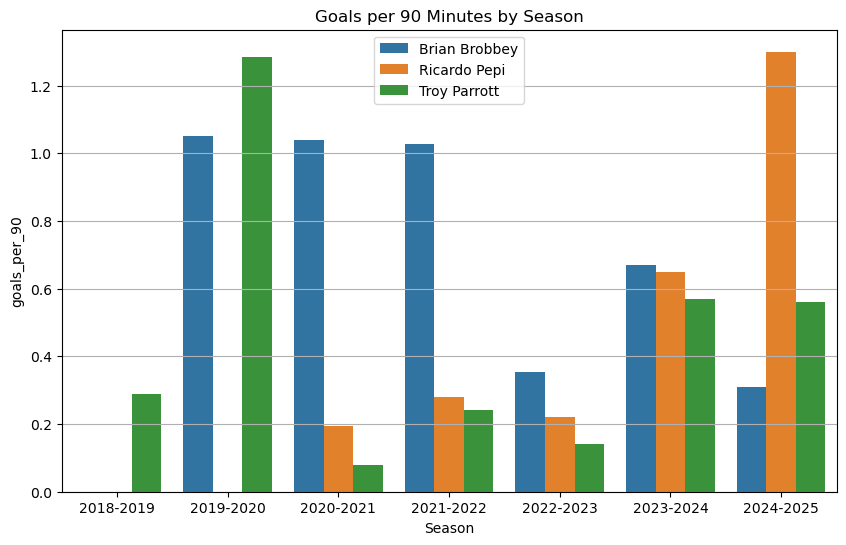

In [557]:
plt.figure(figsize=(10,6))
sns.barplot(x='Season', y='goals_per_90', hue='player', data=df_standard,errorbar=None)
plt.legend()
plt.title('Goals per 90 Minutes by Season')
plt.grid(axis='y')
plt.show()

Currently, Brobbey's goal-scoring efficiency has dropped by half than his previous season. This season, Brobbey scores 1 goal every 3.23 games, whereas PSV's Ricardo Pepi finds the net every 1.25 games (counting both Jong PSV & PSV Eindhoven). Looking at 2020-2021 & 2021-2022 season the rates are higher, partly due to fewer minutes played, which could have influenced efficiency.

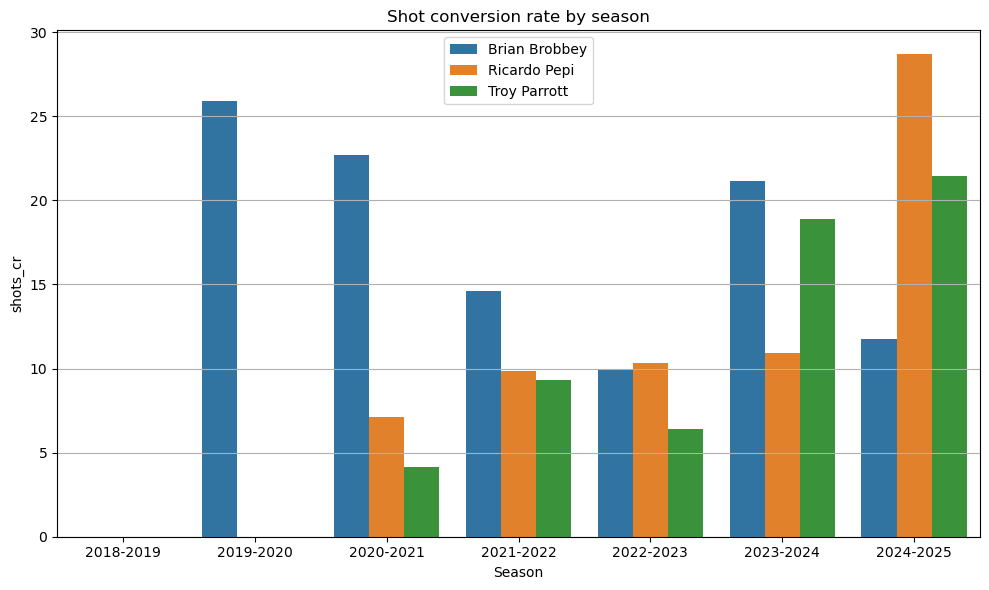

In [558]:
plt.figure(figsize=(10,6))
sns.barplot(x='Season', y='shots_cr', hue='player', data=df_shooting,errorbar=None)
plt.legend()
plt.title('Shot conversion rate by season')
plt.tight_layout()
plt.grid(axis='y')

Looking at the three strikers shot conversion rate (goals scored / total shots), both players from AZ & PSV are performing better each season, showing an upward trend. This indicates that they are improving as strikers, whereas Brobbey is underperforming. Obviously, the season is not over but calculating the matches left * 90 minutes, the amount of minutes played would result somewhat the same as in the last season.

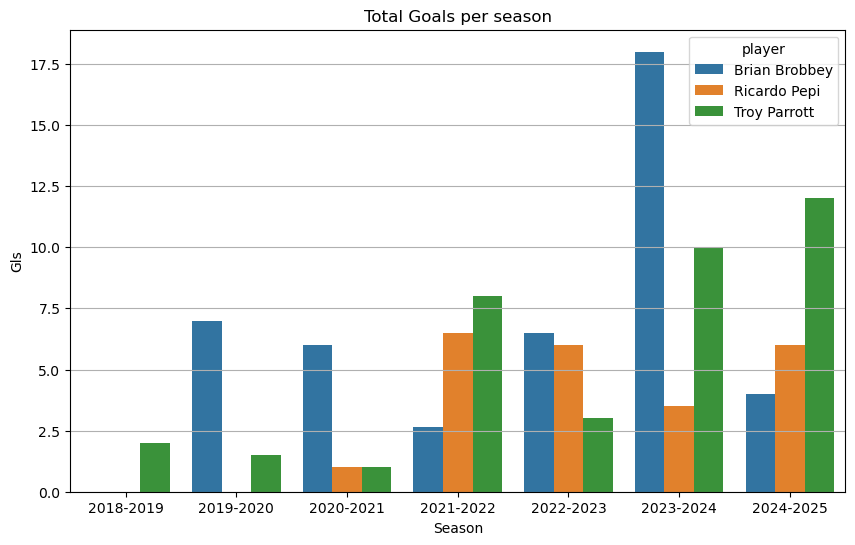

In [559]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_standard, x='Season', y='Gls', hue='player',errorbar=None)
plt.grid(axis='y')
plt.title('Total Goals per season')
plt.show()

Troy Parrott is obviously on top here for the current season. Brobbey's last season was great, but looking at current data Brobbey somehow would need to score 14 goals to level his past performance. As of the time of writing this, Ajax has 7 matches left, which would mean he needs to score 2 goals per match. With a goal/90min rate of 0.3, it doesn't look very well.

Text(0.5, 1.0, '2024-2025 Season Comparison')

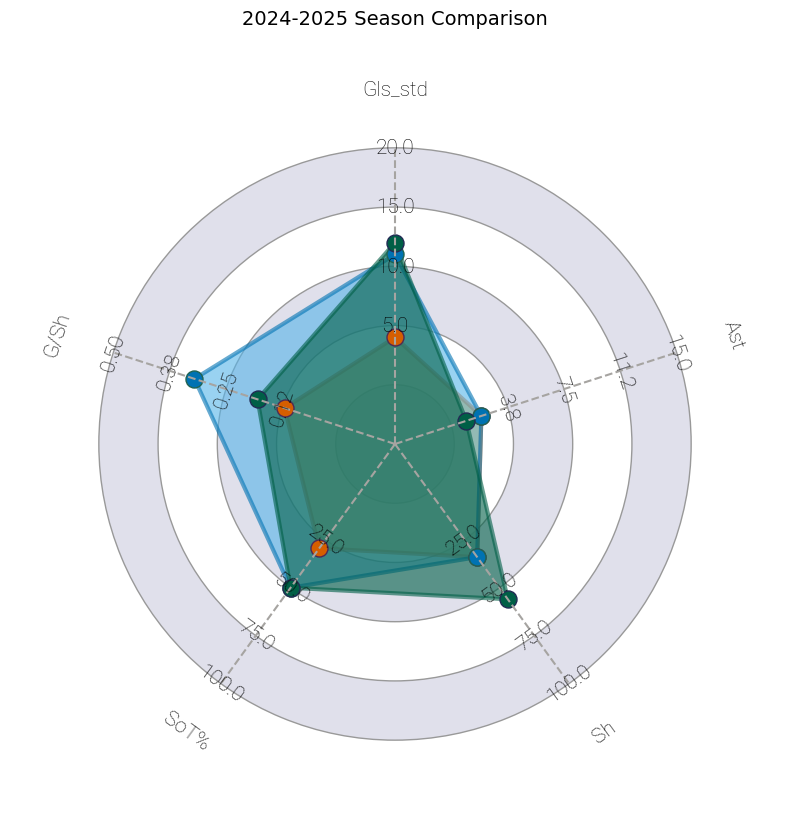

In [658]:
df_combined = pd.merge(df_standard,df_shooting,on=['player','Season','Squad'],suffixes=('_std','_shoot'))
params = ['Gls_std','Ast','Sh','SoT%','G/Sh']
low = [0,0,0,0,0]
high = [20,10,100,100,0.5]

# Set up data
brobbey_data = df_combined[(df_combined['player'] == 'Brian Brobbey') & (df_combined['Season'] == '2024-2025')][params].values.flatten().tolist()
pepi_data = df_combined[(df_combined['player'] == 'Ricardo Pepi') & (df_combined['Season'] == '2024-2025') & (df_combined['Squad'] == 'PSV Eindhoven')][params].values.flatten().tolist()
parrott_data = df_combined[(df_combined['player'] == 'Troy Parrott') & (df_combined['Season'] == '2024-2025')][params].values.flatten().tolist()
URL_font = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL_font)

# Dictionary for easy reference instead of manually copying each color code.
colors = {
    'brobbey':{'face':'#E69F00','edge':'#D55E00'},
    'pepi':{'face':'#56B4E9','edge':'#0072B2'},
    'parrott':{'face':'#009E73','edge':'#005f46'}
}

fig, ax = radar.setup_axis(figsize=(10,10))
rings_inner = radar.draw_circles(ax=ax, facecolor='#e0e0eb', edgecolor='#999999')

# Set up and draw radar
radar1, vertices1 = radar.draw_radar_solid(brobbey_data, ax=ax,
                                          kwargs={'facecolor':colors['brobbey']['face'],
                                                 'alpha': 0.6,
                                                 'edgecolor':colors['brobbey']['edge'],
                                                 'lw': 3})
radar2, vertices2 = radar.draw_radar_solid(pepi_data, ax=ax,
                                          kwargs={'facecolor':colors['pepi']['face'],
                                                 'alpha':0.6,
                                                 'edgecolor':colors['pepi']['edge'],
                                                 'lw':3})
radar3, vertices3 = radar.draw_radar_solid(parrott_data, ax=ax,
                                          kwargs={'facecolor':colors['parrott']['edge'],
                                                 'alpha':0.6,
                                                 'edgecolor':colors['parrott']['edge'],
                                                 'lw':3})

ax.scatter(vertices1[:,0], vertices1[:,1],
          c=colors['brobbey']['edge'], edgecolors='#502a54', marker='o', s=150, zorder=2)
ax.scatter(vertices2[:,0], vertices2[:,1],
          c=colors['pepi']['edge'], edgecolors='#216352', marker='o', s=150, zorder=2)
ax.scatter(vertices3[:,0], vertices3[:,1],
          c=colors['parrott']['edge'], edgecolors='#222b54', marker='o', s=150, zorder=2)

# Set range labels, param labels
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, zorder=2.5,fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, zorder=2.5,fontproperties=robotto_thin.prop)
lines = radar.spoke(ax=ax, color='#a6a4a1',linestyle='--',zorder=2)
plt.title('2024-2025 Season Comparison', pad=25, fontsize=14)

Note: Pepi's stats are lower in this visualization, as only PSV Eindhoven is counted. Jong PSV is omitted.

Overall stats in a radar (spider) visualization. For reference:

Brobbey - Orange

Pepi - Blue

Parrott - Green

Again, if it was not already obvious, you can see that Brobbey underperforms on goals, assists, shots, shots on target %, goals per shots, comparing to his peers. He only draws with Pepi on assists, which might indicate that in this season Farioli haves him playing a role that involves more link-up play rather than being the primary goal scorer. This could suggest that Brobbey is being utilized in a way that prioritizes hold-up play, pressing, or creating space for teammates rather than finishing chances himself. However, if his goal output remains low despite this, it raises questions about whether his positioning, finishing ability, or the quality of service he receives needs improvement. 